# Building a House Price Predictor API  
The client is interested in forecasting houses so the company can look to invest. Rather than using a registered valuer they're looking for something which can be done using the latest technology. Jamie has collected some data on existing house prices over the last few years and has asked to see what you can do. 

# 1. Import Data

In [1]:
!pip install pandas scikit-learn xgboost dill

In [2]:
import pandas as pd

In [3]:
# Load in data
df = pd.read_csv('regressiondata.csv', index_col='ID')

In [4]:
df.head(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963
5,2020.02,16.0,806.752405,1.0,5212.0,281262
6,2019.01,12.0,561.741678,5.0,5614.0,324167
7,2019.06,2.0,612.550897,4.0,5213.0,343720
8,2020.03,40.0,70.565801,8.0,5222.0,668514


In [5]:
df.tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,2020.11,18.0,856.174897,0.0,5614.0,257663
9354,2021.10,6.0,87.260667,9.0,5614.0,681072
9355,2020.12,20.0,584.007146,4.0,5614.0,403096


In [6]:
#Get a specific row
df.iloc[9351]

TransactionDate        2019.07
HouseAge                  36.0
DistanceToStation    554.32482
NumberOfPubs               3.0
PostCode                5217.0
HousePrice              420246
Name: 9351, dtype: object

# 2. Split Data to Prevent Snooping Bias

In [7]:
#Import splitting fucntion
from sklearn.model_selection import train_test_split

In [8]:
#Split data into training and testing
train, test = train_test_split(df, test_size=0.3,random_state=1234)

In [9]:
#See the train partition
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,2019.03,34.0,124.082230,8.0,5212.0,250495


# 3. Exploratory Data Analysis

## Bird's Eye View

In [10]:
train.iloc[0]['HousePrice']

'460286'

In [11]:
train.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [12]:
#Get info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6549 entries, 8450 to 8915
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6548 non-null   float64
 1   HouseAge           6546 non-null   float64
 2   DistanceToStation  6547 non-null   float64
 3   NumberOfPubs       6547 non-null   float64
 4   PostCode           6547 non-null   float64
 5   HousePrice         6544 non-null   object 
dtypes: float64(5), object(1)
memory usage: 358.1+ KB


 5 features and 1 target

In [13]:
train.describe()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


In [14]:
# Type cast incorrect datatypes to new datatypes
train['PostCode'] = train['PostCode'].astype(str)
train['TransactionDate'] = train['TransactionDate'].astype(str)

# Next line can't run because there are prices with the value '??'
#train['HousePrice'] = train['HousePrice'].astype(float)

In [15]:
#Create summary statistics fro non-numeric features
train.describe(include='object')

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,290262
freq,212,1338,2


In [16]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice            object
dtype: object

## Analyse Numerical Attributes

### Plot Distributions

In [17]:
#Install dependencies
!pip install matplotlib seaborn

In [18]:
!pip show matplotlib

Name: matplotlib
Version: 3.7.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /Users/anapedra/anaconda3/lib/python3.10/site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn


In [19]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Users/anapedra/anaconda3/lib/python3.10/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [20]:
#import data viz libraries
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
train.shape

(6549, 6)

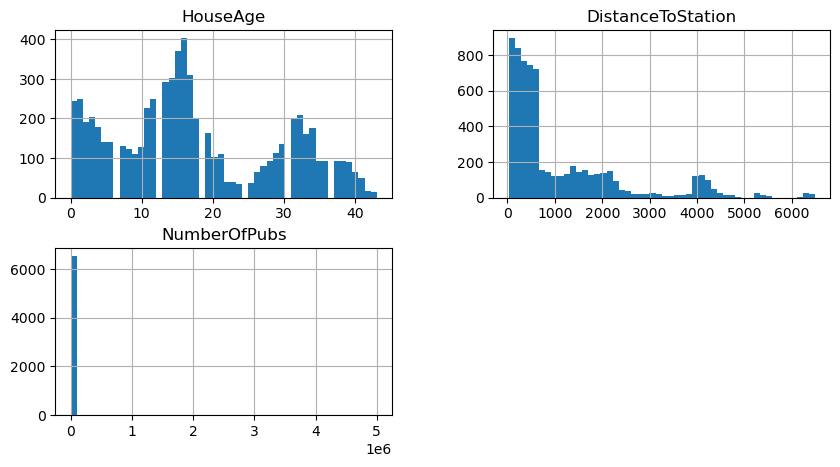

In [22]:
#plot distributions
train.hist(figsize=(10,5), bins=50)
plt.show()

### Why isn't House Price Showing up as Numeric?

In [23]:
#str => float
# We can't run the next line because there's rows with value '??' as the house price
# train['HousePrice'].astype(float) --> Cause error

In [24]:
#Filter dataset based on Houseprice == '??'
train[train['HousePrice'] == '??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8718,2020.08,16.0,122.432508,5.0,5213.0,??


In [25]:
#Drop rows that equal '??'
train = train[train['HousePrice'] != '??']

In [26]:
#Double check if the row has been dropped
train[train['HousePrice'] == '??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [27]:
train['HousePrice'] = train['HousePrice'].astype(float)

In [28]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

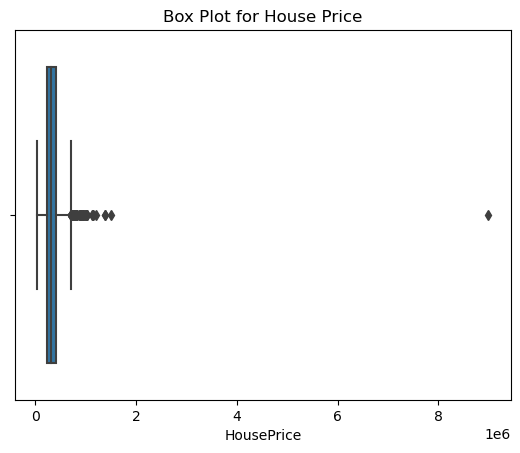

In [29]:
plt.title('Box Plot for House Price')
sns.boxplot(x=train['HousePrice'])
plt.show()

### Drop Outlier 

In [30]:
#find the outlier
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [31]:
train = train.drop(8445)

In [32]:
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5091,2020.05,10.0,295.072723,1.0,5614.0,1151940.0
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


### What's happening with pubs

In [33]:
train.sort_values('NumberOfPubs').tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
422,2019.1,32.0,164.514773,10.0,5614.0,346126.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [34]:
train.drop(13, inplace=True)

In [35]:
train.sort_values('NumberOfPubs').tail()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
3195,2020.11,32.0,324.371247,10.0,5614.0,488918.0
2996,2020.03,28.0,772.777219,10.0,5217.0,299235.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0
8112,2019.08,20.0,370.088151,NaN,nan,NaN


## Analyse Categorical Variables

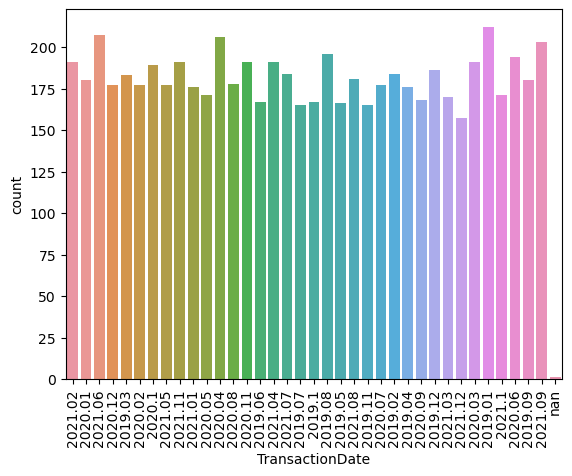

In [36]:
#create a countplot for transaction date
plt.xticks(rotation=90)
sns.countplot(x='TransactionDate',data=train)
plt.show()

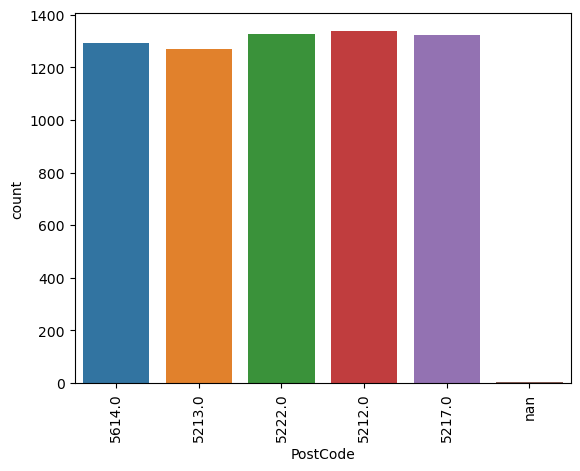

In [37]:
#create a countplot for transaction date
plt.xticks(rotation=90)
sns.countplot(x=train['PostCode'])
plt.show()

## Analyse Relationships Numeric/Numeric

### Calculate Pearson's Correlation

In [38]:
#calculate pearsons correlation
train.select_dtypes(exclude='object').corr()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice
HouseAge,1.000000,0.034074,0.044189,-0.156693
DistanceToStation,0.034074,1.000000,-0.586704,-0.539859
NumberOfPubs,0.044189,-0.586704,1.000000,0.452309
HousePrice,-0.156693,-0.539859,0.452309,1.000000


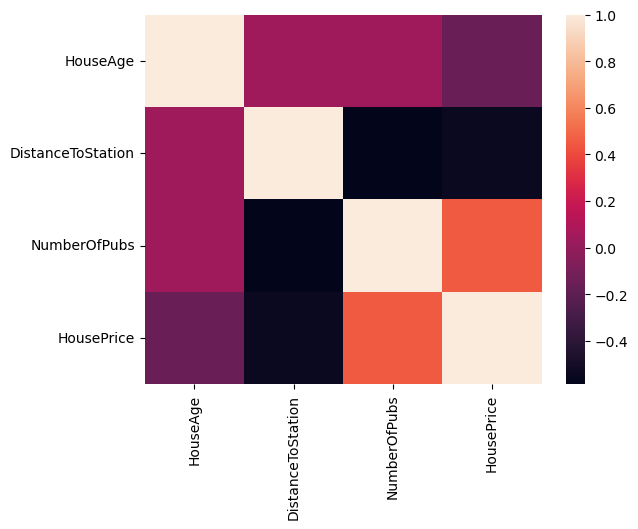

In [39]:
#visz correlation using a heatmap
sns.heatmap(train.select_dtypes(exclude='object').corr())
plt.show()

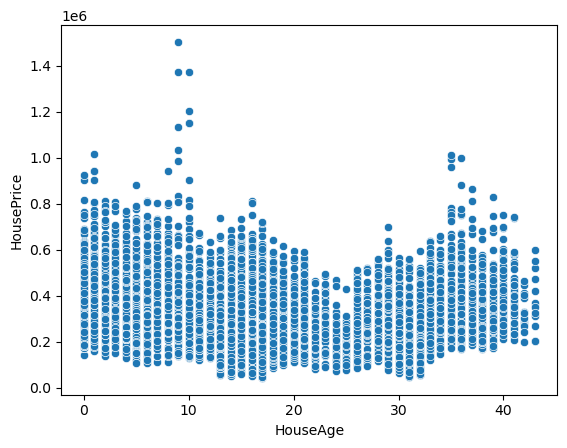

In [40]:
#create a scatterplot
sns.scatterplot(x='HouseAge',y='HousePrice', data=train)
plt.show()

## Analyse Relationships Cat/Num

### Is Post Code Driving Value?

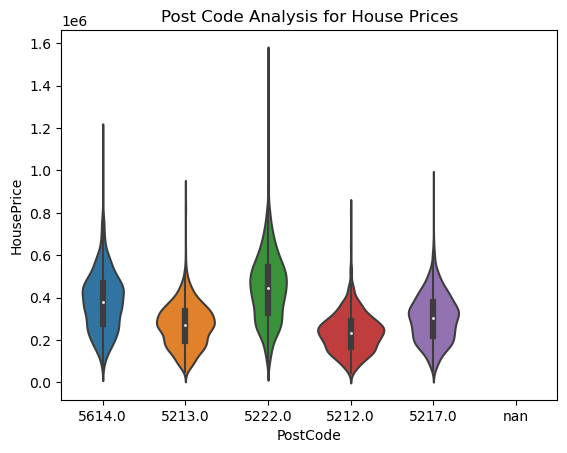

In [41]:
plt.title('Post Code Analysis for House Prices')
sns.violinplot(x='PostCode',y='HousePrice', data=train)
plt.show()

In [42]:
#check for nulls in a column
train[train['TransactionDate'].isnull()]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [43]:
#check if a string exists in a column
train[train['TransactionDate']=='nan']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
7673,nan,NaN,3830.892098,0.0,5217.0,NaN


In [44]:
What about the date it was sold?

Object `sold` not found.


In [45]:
#Drop missing house prices
train = train[~train['HousePrice'].isnull()]

In [46]:
train[train['TransactionDate'].isnull()]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [47]:
int(train.iloc[0]['TransactionDate'][5:])

2

In [48]:
#Apply string transformation on Transaction Date
train['YearSold'] = train['TransactionDate'].apply(lambda x: x[:4]).astype(int)
train['MonthSold'] = train['TransactionDate'].apply(lambda x: x[5:]).astype(int)

In [49]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice,YearSold,MonthSold
ID,,,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0,2021,2
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0,2020,1
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0,2021,6
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0,2020,12
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0,2019,3


In [50]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
YearSold               int64
MonthSold              int64
dtype: object

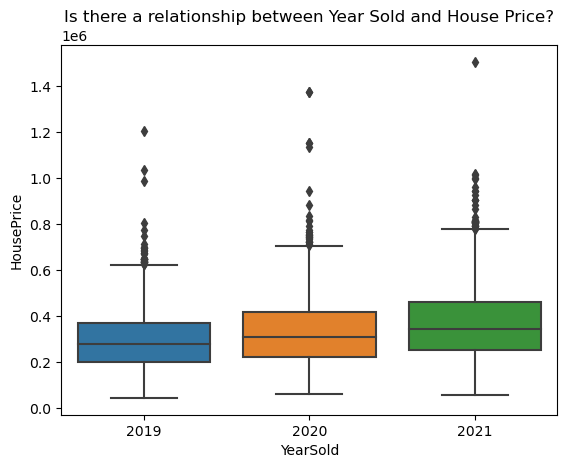

In [51]:
plt.title('Is there a relationship between Year Sold and House Price?')
sns.boxplot(x='YearSold',y='HousePrice',data=train)
plt.show()

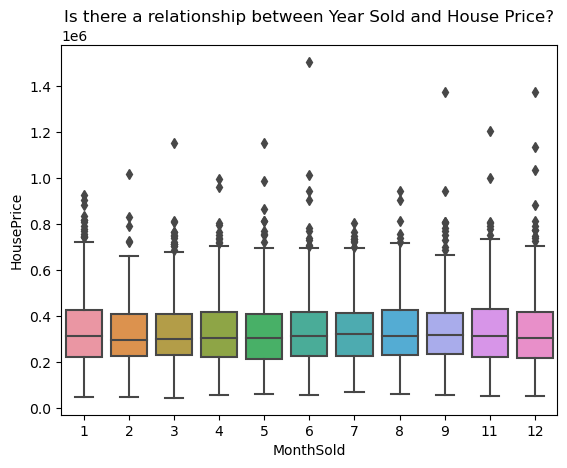

In [52]:
plt.title('Is there a relationship between Year Sold and House Price?')
sns.boxplot(x='MonthSold',y='HousePrice',data=train)
plt.show()

# 4. Data Preprocessing

## Build Preprocessing Function

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [54]:
#using simple imputer
imputer = SimpleImputer()
imputer.fit(train[['HouseAge','DistanceToStation','NumberOfPubs']])
imputer.transform(train[['HouseAge','DistanceToStation','NumberOfPubs']])

array([[3.40000000e+01, 4.60994365e+02, 8.00000000e+00],
       [1.70000000e+01, 6.14851833e+02, 3.00000000e+00],
       [3.40000000e+01, 2.85892687e+02, 9.00000000e+00],
       ...,
       [1.60000000e+01, 6.05834036e+02, 2.00000000e+00],
       [3.60000000e+01, 3.45823461e+01, 7.00000000e+00],
       [1.20000000e+01, 1.59998338e+03, 1.00000000e+00]])

In [55]:
train[train['HouseAge'].isnull()][['HouseAge','DistanceToStation','NumberOfPubs']]

,HouseAge,DistanceToStation,NumberOfPubs
ID,,,
2416,NaN,NaN,NaN
24,NaN,NaN,4.0


In [56]:
train['HouseAge'].mean()

17.379721669980118

In [57]:
train['HouseAge'].std()

11.471006657798567

In [58]:
(34.0 - train['HouseAge'].mean()) / train['HouseAge'].std()

1.4488944890220756

In [59]:
train['HouseAge']

ID
8450    34.0
5758    17.0
4030    34.0
8447     0.0
4370    34.0
        ... 
664     37.0
7540    34.0
7221    16.0
1318    36.0
8915    12.0
Name: HouseAge, Length: 6541, dtype: float64

In [60]:
onehot = OneHotEncoder()
onehot.fit(train[['PostCode']])
onehot.transform(train[['PostCode']]).toarray()
onehot.get_feature_names_out()

array(['PostCode_5212.0', 'PostCode_5213.0', 'PostCode_5217.0',
       'PostCode_5222.0', 'PostCode_5614.0'], dtype=object)

In [61]:
train['PostCode']

ID
8450    5614.0
5758    5213.0
4030    5614.0
8447    5222.0
4370    5212.0
         ...  
664     5217.0
7540    5212.0
7221    5217.0
1318    5217.0
8915    5614.0
Name: PostCode, Length: 6541, dtype: object

In [62]:
class Preprocessor(BaseEstimator, TransformerMixin):
    #Train our custom preprocessors
    def fit(self, X, y=None):
        
        #Create and fit simple imputer
        self.imputer = SimpleImputer()
        self.imputer.fit(X[['HouseAge','DistanceToStation','NumberOfPubs']])
        
        #Create and fit Standard Scaler
        self.scaler = StandardScaler()
        self.scaler.fit(X[['HouseAge','DistanceToStation','NumberOfPubs']])
        
        #Create and fot one hot encoder
        self.onehot = OneHotEncoder(handle_unknown = 'ignore')
        self.onehot.fit(X[['PostCode']])
        
        return self
    
    #Apply our custom preprocessors
    def transform(self,X):
        
        #Apply simple imputer
        imputed_cols = self.imputer.transform(X[['HouseAge','DistanceToStation','NumberOfPubs']])
        onehot_cols = self.onehot.transform(X[['PostCode']])
        #Copy the df
        transformed_df = X.copy()
        
        #Apply year and month transforms
        transformed_df['Year'] = transformed_df['TransactionDate'].apply(lambda x: x[:4]).astype(int)
        transformed_df['Month'] = transformed_df['TransactionDate'].apply(lambda x: x[5:]).astype(int)
        transformed_df = transformed_df.drop('TransactionDate', axis=1)
        
        #Apply transformed columns
        transformed_df[['HouseAge','DistanceToStation','NumberOfPubs']] = imputed_cols
        transformed_df[['HouseAge','DistanceToStation','NumberOfPubs']] = self.scaler.transform(transformed_df[['HouseAge','DistanceToStation','NumberOfPubs']])
        
        #Drop existing Post Code column and replace with one hot equiv
        transformed_df = transformed_df.drop('PostCode',axis=1)
        transformed_df[self.onehot.get_feature_names_out()] = onehot_cols.toarray().astype(int)
        
        return transformed_df

In [63]:
preproc = Preprocessor()

In [64]:
preproc.fit(train)

Preprocessor()

In [65]:
preproc.transform(train.drop(['YearSold','MonthSold'],axis=1))

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,Year,Month,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0
ID,,,,,,,,,,,
8450,1.449005,-0.496716,1.328375,460286.0,2021,2,0,0,0,0,1
5758,-0.033105,-0.375573,-0.363196,253332.0,2020,1,0,1,0,0,0
4030,1.449005,-0.634586,1.666689,486532.0,2021,6,0,0,0,0,1
8447,-1.515216,-0.705984,0.651746,595168.0,2020,12,0,0,0,1,0
4370,1.449005,-0.761991,1.328375,250495.0,2019,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
664,1.710554,-0.564089,-1.039825,301492.0,2020,8,0,0,1,0,0
7540,1.449005,-0.769644,0.313432,174239.0,2020,8,1,0,0,0,0
7221,-0.120288,-0.382673,-0.701510,327666.0,2020,2,0,0,1,0,0


## Preview Preprocessed Data

In [66]:
preprocessed_df = preproc.transform(train.drop(['YearSold','MonthSold'],axis=1))
preprocessed_df.head()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,Year,Month,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0
ID,,,,,,,,,,,
8450,1.449005,-0.496716,1.328375,460286.0,2021,2,0,0,0,0,1
5758,-0.033105,-0.375573,-0.363196,253332.0,2020,1,0,1,0,0,0
4030,1.449005,-0.634586,1.666689,486532.0,2021,6,0,0,0,0,1
8447,-1.515216,-0.705984,0.651746,595168.0,2020,12,0,0,0,1,0
4370,1.449005,-0.761991,1.328375,250495.0,2019,3,1,0,0,0,0


In [67]:
preprocessed_df.dtypes

HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
HousePrice           float64
Year                   int64
Month                  int64
PostCode_5212.0        int64
PostCode_5213.0        int64
PostCode_5217.0        int64
PostCode_5222.0        int64
PostCode_5614.0        int64
dtype: object

In [68]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6541 entries, 8450 to 8915
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HouseAge           6541 non-null   float64
 1   DistanceToStation  6541 non-null   float64
 2   NumberOfPubs       6541 non-null   float64
 3   HousePrice         6541 non-null   float64
 4   Year               6541 non-null   int64  
 5   Month              6541 non-null   int64  
 6   PostCode_5212.0    6541 non-null   int64  
 7   PostCode_5213.0    6541 non-null   int64  
 8   PostCode_5217.0    6541 non-null   int64  
 9   PostCode_5222.0    6541 non-null   int64  
 10  PostCode_5614.0    6541 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 613.2 KB


## Clean up Analysis Features

In [69]:
train = train.drop(['YearSold','MonthSold'], axis=1)

In [70]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0


## Create X and y values

In [71]:
X_train = train.drop('HousePrice', axis=1)
y_train = train['HousePrice']

# 5. Modelling

## Import ML Dependencies

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

## Create Pipelines

In [73]:
pipelines = {
    'ridge': make_pipeline(Preprocessor(), Ridge()),
    'rf': make_pipeline(Preprocessor(), RandomForestRegressor()),
    'gb': make_pipeline(Preprocessor(), GradientBoostingRegressor()),
    'xg': make_pipeline(Preprocessor(), XGBRegressor()),
}

In [74]:
pipelines['xg']

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [75]:
pipelines['ridge']

Pipeline(steps=[('preprocessor', Preprocessor()), ('ridge', Ridge())])

# Training Outside of a pipeline

In [76]:
X_temp = preprocessed_df.drop('HousePrice', axis=1)
y_temp = preprocessed_df['HousePrice']


In [77]:
ridgemodel = Ridge()

In [78]:
ridgemodel.fit(X_temp, y_temp)

Ridge()

In [79]:
ridgemodel.predict(X_temp)

array([453158.70403588, 281048.56313422, 473919.1346858 , ...,
       305550.331     , 349468.79290658, 301856.67576402])

## Create Tuning Grids

In [80]:
pipelines['ridge'].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()), ('ridge', Ridge())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'ridge': Ridge(),
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

In [81]:
pipelines['ridge']['ridge'].alpha

1.0

In [82]:
pipelines['xg'].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()),
  ('xgbregressor',
   XGBRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...))],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'xgbregressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
             

In [83]:
grid = {
    'ridge':{'ridge__alpha':[0.05,0.25,0.5,1.0]},
    'rf':{
        'randomforestregressor__n_estimators':[100,200,300],
        'randomforestregressor__max_depth':[5,6,7, None]
    },
    'gb':{
        'gradientboostingregressor__n_estimators':[100,200,300],
        'gradientboostingregressor__max_depth':[5,6,7, None]
    },
    'xg':{
        'xgbregressor__n_estimators':[100,200,300],
        'xgbregressor__max_depth':[5,6,7, None]
    }
}
    

## Train Models and Perform HPO

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
X_train

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
ID,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0
5758,2020.01,17.0,614.851833,3.0,5213.0
4030,2021.06,34.0,285.892687,9.0,5614.0
8447,2020.12,0.0,195.213314,6.0,5222.0
4370,2019.03,34.0,124.082230,8.0,5212.0
...,...,...,...,...,...
664,2020.08,37.0,375.427313,1.0,5217.0
7540,2020.08,34.0,114.362370,5.0,5212.0
7221,2020.02,16.0,605.834036,2.0,5217.0


In [86]:
X_train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
dtype: object

In [87]:
fit_models = {}
for algo, pipeline in pipelines.items():
    try:
        print(algo)
        model = GridSearchCV(pipeline, grid[algo],n_jobs=-1, cv=10, scoring='r2')
        model.fit(X_train, y_train)
        fit_models[algo]= model
    except Exception as e:
        print(f'Model {algo} had an error {e}')
    

ridge
rf
gb
xg


# 6. Evaluate Models

## Import Evaluation Metrics

In [88]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Preprocess Test Set For Predictions

### Look for Nulls

In [89]:
#Look for nulls in dataset
test.isnull().sum()

TransactionDate      1
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           2
dtype: int64

In [90]:
#Drop any nulls in the house price
test = test[~test.HousePrice.isnull()]

In [91]:
# Doublecheck nulls are removed
test.isnull().sum()

TransactionDate      0
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

### Check datatypes

In [92]:
test.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [93]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

In [94]:
#Fix datatypes in test dataframe
test = test[test['HousePrice']!='??']
test['HousePrice'] = test.HousePrice.astype(float)
test['TransactionDate'] = test.TransactionDate.astype(str)
test['PostCode'] = test.PostCode.astype(str)


In [95]:
test.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

### Create X_test and y_test 

In [96]:
X_test = test.drop('HousePrice', axis=1)
y_test = test['HousePrice']

In [97]:
X_test.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
ID,,,,,
7857,2021.11,0.0,267.000535,6.0,5222.0
1641,2021.04,12.0,500.080510,5.0,5212.0
3620,2019.07,14.0,4024.663391,0.0,5614.0
2820,2020.09,18.0,568.954185,4.0,5614.0
1572,2020.07,11.0,44.210016,1.0,5614.0


In [98]:
X_test.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
dtype: object

In [99]:
y_test

ID
7857    919497.0
1641    283680.0
3620    135818.0
2820    468742.0
1572    311065.0
          ...   
435     234950.0
3452    467844.0
2127    502553.0
7510    766626.0
641     437310.0
Name: HousePrice, Length: 2803, dtype: float64

## Calculate Regression Metrics

In [100]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    r2 = r2_score(y_test,yhat)
    mae = mean_absolute_error(y_test, yhat)
    print(f'{algo}- R2 Score:{r2}, MAE Score:{mae}')

ridge- R2 Score:0.6691443155811749, MAE Score:62578.087797397166
rf- R2 Score:0.8224377169094927, MAE Score:44350.8404661672
gb- R2 Score:0.863246137785276, MAE Score:38667.1027501782
xg- R2 Score:0.853617617693814, MAE Score:39618.537530937836


In [101]:
##R2 score as close to 1 as possible and mae score as close as possible

## Make Predictions

In [102]:
model = fit_models['gb']
yhat = model.predict(X_test)
results_df = y_test.to_frame()
results_df['yhat'] = yhat
results_df['delta'] = results_df.HousePrice.astype(float) - results_df.yhat

In [103]:
results_df.to_csv('results.csv')

## Explain model

### Calculate Feature Importance

In [104]:
ensemble = model.best_estimator_['gradientboostingregressor']

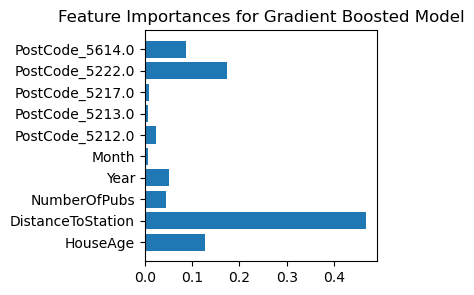

In [105]:
plt.figure(figsize=(3,3))
plt.title('Feature Importances for Gradient Boosted Model')
plt.barh(ensemble.feature_names_in_, ensemble.feature_importances_)
plt.show()

### Calculate Feature Importance for All Models

In [106]:
import numpy as np

In [107]:
new_metric = np.square(fit_models['ridge'].best_estimator_[1].coef_) / np.sum(np.square(fit_models['ridge'].best_estimator_[1].coef_))

In [108]:
np.sum(new_metric)

1.0

In [109]:
feature_importances = {}
for algo, pipeline in fit_models.items():
    if algo == 'ridge':
        coef_ = pipeline.best_estimator_[1].coef_
        feature_importances[algo] = np.square(coef_) / np.sum(np.square(coef_))
    

    else:
        feature_importances[algo] = pipeline.best_estimator_[1].feature_importances_

In [110]:
feature_importances

{'ridge': array([1.64842453e-02, 1.01874497e-01, 3.10969377e-02, 3.86862977e-02,
        5.94596526e-06, 2.25704876e-01, 9.47271060e-02, 1.69412578e-02,
        3.92285970e-01, 8.21928660e-02]),
 'rf': array([0.13699202, 0.44529687, 0.05537605, 0.05117412, 0.0343881 ,
        0.00889571, 0.00270619, 0.01198405, 0.16688399, 0.08630289]),
 'gb': array([0.12769258, 0.46778124, 0.04482034, 0.05175817, 0.00619733,
        0.02394099, 0.00644795, 0.0096582 , 0.17483486, 0.08686834]),
 'xg': array([0.03207528, 0.07127062, 0.02292063, 0.05411822, 0.00475283,
        0.09275293, 0.02268689, 0.04478648, 0.41193107, 0.24270506],
       dtype=float32)}

In [111]:
importance_df = pd.DataFrame(feature_importances, index=ensemble.feature_names_in_)
importance_df

,ridge,rf,gb,xg
HouseAge,0.016484,0.136992,0.127693,0.032075
DistanceToStation,0.101874,0.445297,0.467781,0.071271
NumberOfPubs,0.031097,0.055376,0.044820,0.022921
Year,0.038686,0.051174,0.051758,0.054118
Month,0.000006,0.034388,0.006197,0.004753
PostCode_5212.0,0.225705,0.008896,0.023941,0.092753
PostCode_5213.0,0.094727,0.002706,0.006448,0.022687
PostCode_5217.0,0.016941,0.011984,0.009658,0.044786
PostCode_5222.0,0.392286,0.166884,0.174835,0.411931
PostCode_5614.0,0.082193,0.086303,0.086868,0.242705


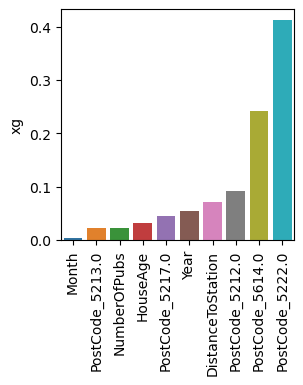

In [112]:
plt.figure(figsize=(3,3))
model_name = 'xg'
sorted_imp = importance_df.sort_values(model_name)
sns.barplot(x = sorted_imp.index, y= model_name, data = sorted_imp)
plt.xticks(rotation=90)
plt.show()

### Plot Trees

In [113]:
!pip install graphviz

In [114]:
from sklearn.tree import plot_tree
import xgboost as xgb
from matplotlib.pylab import rcParams

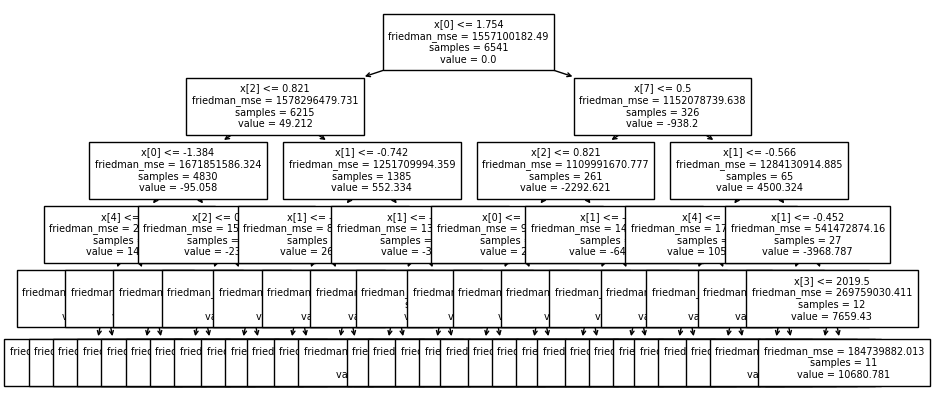

In [115]:
# Plot tree for gradient boosted model
plt.figure(figsize=(10,5))
plot_tree(ensemble.estimators_[299,0], fontsize=7)
plt.show()

In [116]:
ensemble.feature_names_in_[2]

'NumberOfPubs'

In [117]:
X_train.shape

(6541, 5)

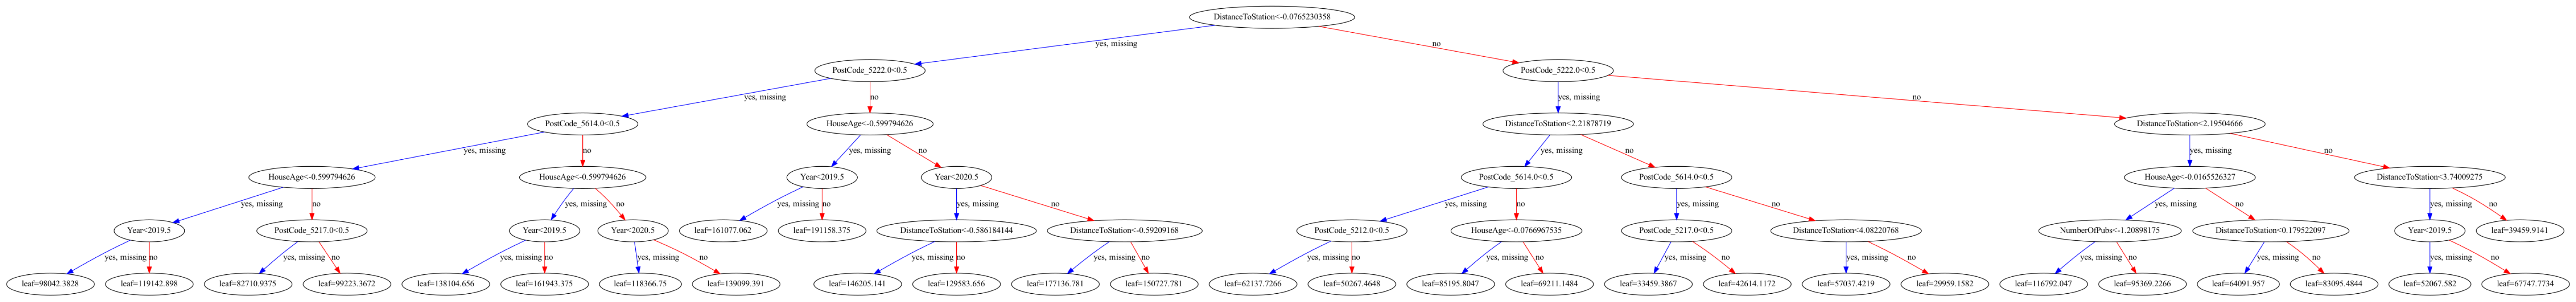

In [125]:
rcParams['figure.figsize'] = 80,100
xgb.plot_tree(fit_models['xg'].best_estimator_[1])

plt.savefig('xg.png', bbox_inches='tight')
plt.show();

# 7. Save model

In [126]:
import dill

In [127]:
model = fit_models['gb']

In [128]:
#save model using dill
with open('gb.pkl','wb') as f:
    dill.dump(model, f)

In [129]:
with open('gb.pkl','rb') as f:
    reloaded_model = dill.load(f)

In [130]:
reloaded_model.predict(X_test)

array([660072.29726806, 289177.79297644, 166619.49465334, ...,
       392935.05936691, 737461.9967578 , 399972.54185107])

In [131]:
X_test.loc[0].to_json()

'{"TransactionDate":"2020.12","HouseAge":17.0,"DistanceToStation":467.6447748,"NumberOfPubs":4.0,"PostCode":"5222.0"}'